In [11]:
# zaimportowanie biblioteki i załadowanie pliku csv, oraz wyświetlenie danych
import pandas as pd
df = pd.read_csv("wzrostwaga.csv")
df.head(30)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
5,Male,67.253016,152.212156
6,Male,68.785081,183.927889
7,Male,68.348516,167.971110
8,Male,67.018950,175.929440
9,Male,63.456494,156.399676


In [12]:
# wartość minimalna
df["Height"].min()
df["Height"].max()

78.9987423463896

In [13]:
# wartość maksymalna
df["Weight"].min()
df["Weight"].max()

269.989698505106

In [14]:
# mediana
df["Height"].mean()
df["Weight"].mean()

161.44035683283076

In [15]:
# średnia
df["Height"].median()
df["Weight"].median()

161.21292769948298

In [16]:
# zamiana cali na centymetry, oraz funtow na kilogramy
df["Height"] = df["Height"] * 2.54
df["Weight"] = df["Weight"] / 2.204622

In [17]:
import matplotlib.pyplot as plt

In [18]:
df["Height"]
df["Weight"]

0       109.721106
1        73.622813
2        96.497656
3        99.809614
4        93.598722
           ...    
9995     62.041227
9996     77.504400
9997     58.275441
9998     74.322247
9999     51.550380
Name: Weight, Length: 10000, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

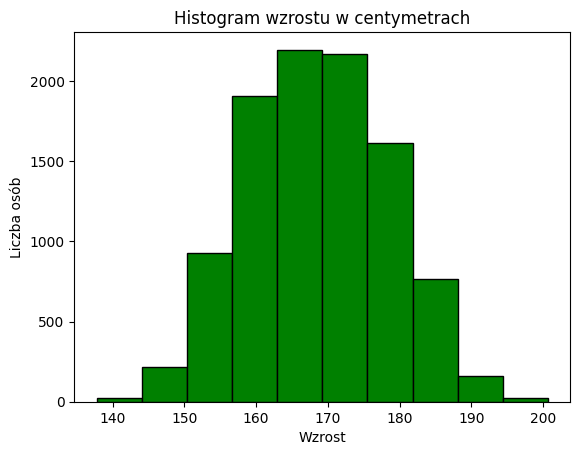

In [19]:
# histogram wzrostu z dziesięcioma binami
plt.hist(df["Height"], bins=10, color="green", edgecolor="black")
plt.title("Histogram wzrostu w centymetrach")
plt.xlabel("Wzrost")
plt.ylabel("Liczba osób")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

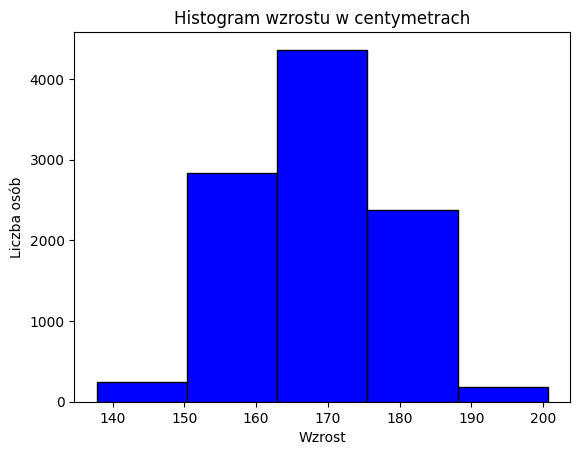

In [20]:
# histogram wzrostu z pięcioma binami
plt.hist(df["Height"], bins=5, color="blue", edgecolor="black")
plt.title("Histogram wzrostu w centymetrach")
plt.xlabel("Wzrost")
plt.ylabel("Liczba osób")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

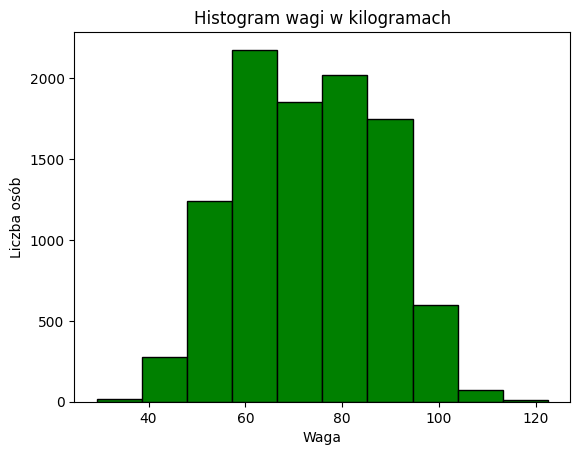

In [21]:
# histogram wagi z dziesięcioma binami
plt.hist(df["Weight"], bins=10, color="green", edgecolor="black")
plt.title("Histogram wagi w kilogramach")
plt.xlabel("Waga")
plt.ylabel("Liczba osób")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

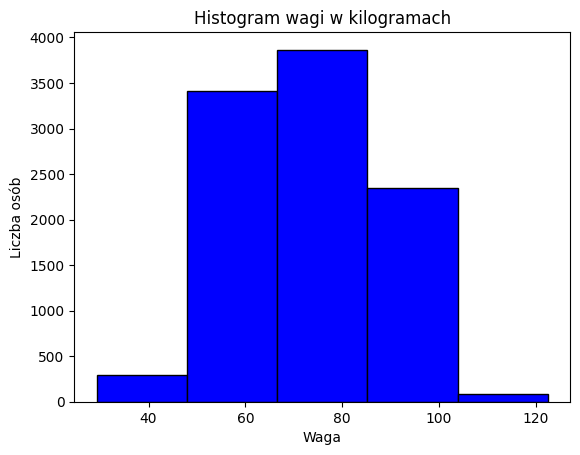

In [22]:
# histogram wagi z pięcioma binami
plt.hist(df["Weight"], bins=5, color="blue", edgecolor="black")
plt.title("Histogram wagi w kilogramach")
plt.xlabel("Waga")
plt.ylabel("Liczba osób")
plt.show

In [23]:
df

,Gender,Height,Weight
0,Male,187.571423,109.721106
1,Male,174.706036,73.622813
2,Male,188.239668,96.497656
3,Male,182.196685,99.809614
4,Male,177.499761,93.598722
...,...,...,...
9995,Female,168.078536,62.041227
9996,Female,170.350573,77.504400
9997,Female,162.224700,58.275441
9998,Female,175.346978,74.322247


In [24]:
# utworzenie kolumny BMI za pomocą wzoru
df["BMI"] = (df["Weight"] / ((df["Height"] / 100) ** 2))

In [25]:
df

,Gender,Height,Weight,BMI
0,Male,187.571423,109.721106,31.185796
1,Male,174.706036,73.622813,24.121071
2,Male,188.239668,96.497656,27.232936
3,Male,182.196685,99.809614,30.067092
4,Male,177.499761,93.598722,29.708065
...,...,...,...,...
9995,Female,168.078536,62.041227,21.961190
9996,Female,170.350573,77.504400,26.707864
9997,Female,162.224700,58.275441,22.143772
9998,Female,175.346978,74.322247,24.172539


In [26]:
# ustalenie zmiennej, która wskazuje osoby ze wzrostem > 180, następnie wywołanie liczby tych wierszy
high = df[df.Height >= 180]
high.shape[0]

1341

In [27]:
# utworzenie nowej kolumny która sprawdza czy dana osoba ma nadwagę (true/false)
df["Overweight"] = df["BMI"].apply(lambda x: 25 <= x < 30)
# obliczenie prawdopodobieństwa czy osoba z bazy ma nadwagę
probability_overweight = df["Overweight"].mean()
print("Prawdopodobieństwo, że osoba ma nadwagę wynosi: ", probability_overweight)

Prawdopodobieństwo, że osoba ma nadwagę wynosi:  0.5589


In [28]:
# wgranie danych z API narodowego Banku Polskiego
import requests
body = requests.get('http://api.nbp.pl/api/exchangerates/tables/A')
df = body.json()
# podajemy przykład danych
data = df[0]['rates']
# tworzymy DataFrame
df = pd.DataFrame(data)
df

,currency,code,mid
0,bat (Tajlandia),THB,0.108000
1,dolar amerykański,USD,3.960700
2,dolar australijski,AUD,2.635000
3,dolar Hongkongu,HKD,0.507100
4,dolar kanadyjski,CAD,2.895700
5,dolar nowozelandzki,NZD,2.450200
6,dolar singapurski,SGD,2.940000
7,euro,EUR,4.308100
8,forint (Węgry),HUF,0.010998
9,frank szwajcarski,CHF,4.439700


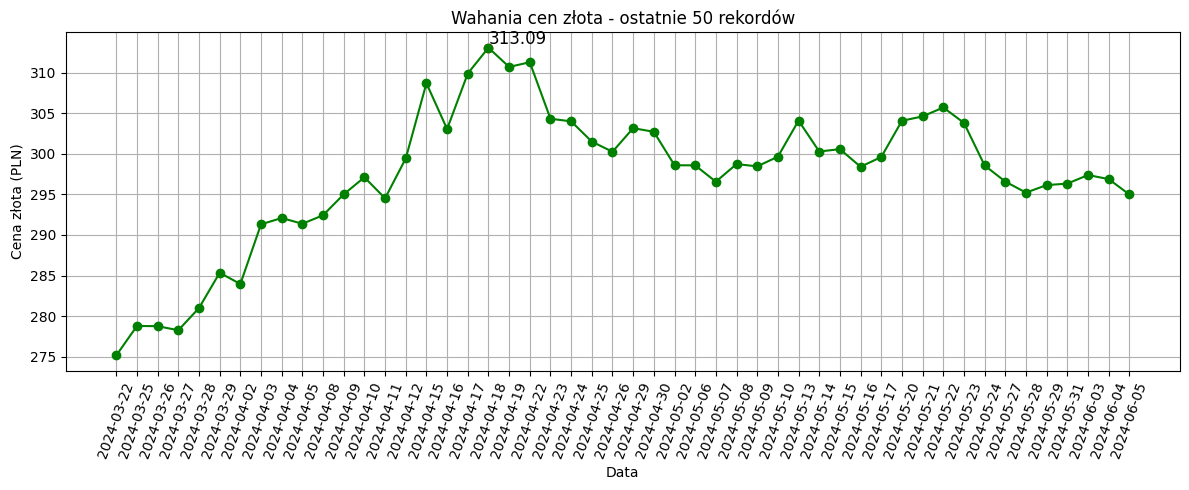

In [29]:
# wgranie danych z API narodowego Banku Polskiego
import requests
response = requests.get('http://api.nbp.pl/api/cenyzlota/last/50/?format=json')
data = response.json()
df = pd.DataFrame(data)
df

# stworzenie wykresu z wahaniami cen złota z ostatnich 50 rekordów
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
plt.plot(df["data"], df["cena"], color='green', marker='o')
plt.title('Wahania cen złota - ostatnie 50 rekordów')
plt.xlabel('Data')
plt.ylabel('Cena złota (PLN)')
plt.grid(True)
plt.xticks(rotation=70)
plt.tight_layout()
# wyznaczenie najwyższej ceny złota
max_value = df["cena"].max()
max_date = df[df['cena'] == max_value]['data'].iloc[0]
# zaznaczenie maksimum czerwonym kolorem
plt.scatter(max_date, max_value, color='red')
# Dodanie tekstu przy punkcie maksymalnym
plt.text(max_date, max_value, f'{max_value}', fontsize=12, verticalalignment='bottom')
plt.show()



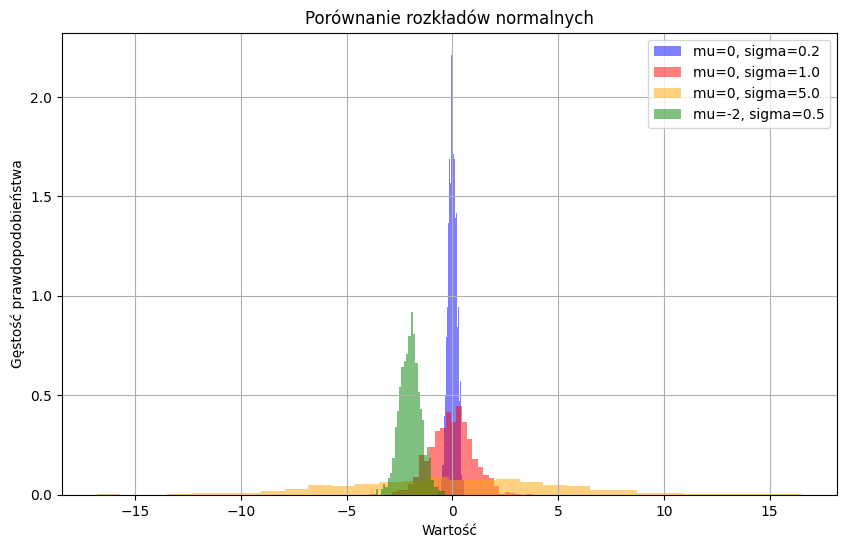

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Parametry rozkładów
mus = [0, 0, 0, -2]  # średnie
sigmas = [0.2, 1.0, 5.0, 0.5]  # odchylenia standardowe
colors = ['blue', 'red', 'orange', 'green']  # kolory dla różnych rozkładów
labels = [
    f'mu={mus[0]}, sigma={sigmas[0]}',
    f'mu={mus[1]}, sigma={sigmas[1]}',
    f'mu={mus[2]}, sigma={sigmas[2]}',
    f'mu={mus[3]}, sigma={sigmas[3]}'
]

# Generowanie danych
samples = [np.random.normal(mu, sigma, 1000) for mu, sigma in zip(mus, sigmas)]

plt.figure(figsize=(10, 6))


# Tworzenie histogramów dla każdego zestawu danych
for sample, color, label in zip(samples, colors, labels):
    plt.hist(sample, bins=30, alpha=0.5, color=color, label=label, density=True)

plt.title('Porównanie rozkładów normalnych')
plt.xlabel('Wartość')
plt.ylabel('Gęstość prawdopodobieństwa')
plt.legend()
plt.grid(True)
plt.show()

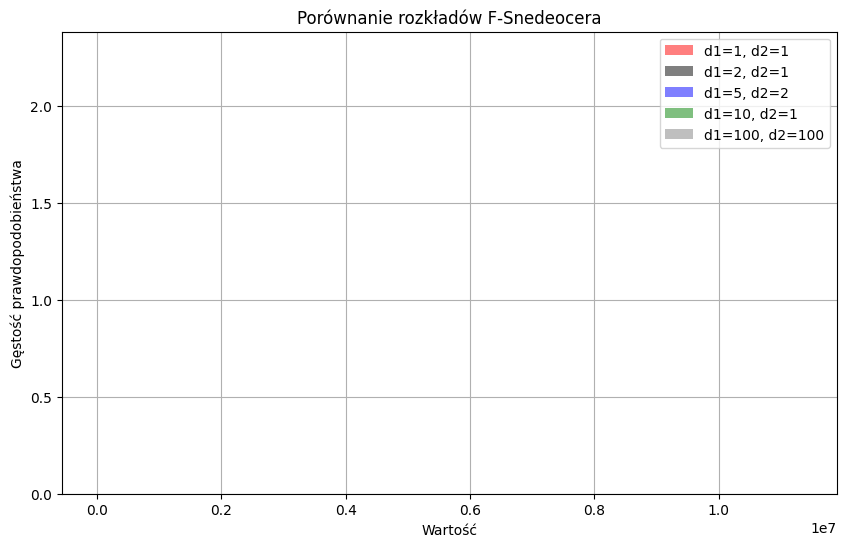

In [31]:
import numpy as np
import matplotlib.pyplot as plt

d1s = [1, 2, 5, 10, 100]
d2s = [1, 1, 2, 1, 100]
colors = ['red', 'black', 'blue', 'green', 'grey']
labels = [
    f'd1={d1s[0]}, d2={d2s[0]}',
    f'd1={d1s[1]}, d2={d2s[1]}',
    f'd1={d1s[2]}, d2={d2s[2]}',
    f'd1={d1s[3]}, d2={d2s[3]}',
    f'd1={d1s[4]}, d2={d2s[4]}' 
]

samples = [np.random.f(d1, d2, 1000) for d1, d2 in zip(d1s, d2s)]

plt.figure(figsize=(10, 6))

for sample, color, label in zip(samples, colors, labels):
    plt.hist(sample, bins=30, alpha=0.5, color=color, label=label, density=True)

plt.title("Porównanie rozkładów F-Snedeocera")
plt.xlabel("Wartość")
plt.ylabel("Gęstość prawdopodobieństwa")
plt.legend()
plt.grid(True)
plt.show()


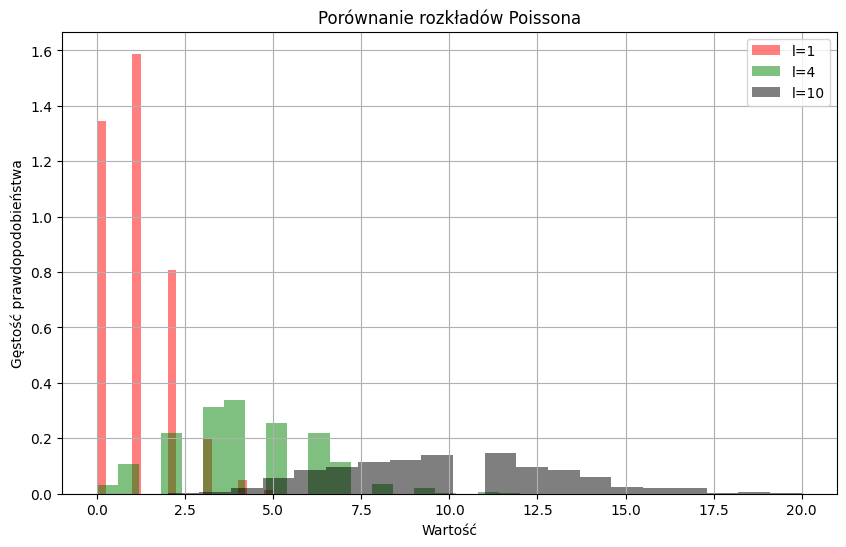

In [32]:
import numpy as np
import matplotlib.pyplot as plt

lambdas = [1, 4, 10]
colors = ['red', 'green', 'black']
labels = [
    f'l={lambdas[0]}',
    f'l={lambdas[1]}',
    f'l={lambdas[2]}'
]

samples = [np.random.poisson(l, 1000) for l in lambdas]

plt.figure(figsize=(10,6))

for sample, color, label in zip(samples, colors, labels):
    plt.hist(sample, bins=20, alpha=0.5, color=color, label=label, density=True)
    
plt.title("Porównanie rozkładów Poissona")
plt.xlabel("Wartość")
plt.ylabel("Gęstość prawdopodobieństwa")
plt.legend()
plt.grid(True)
plt.show()